In [1]:
!nvidia-smi

Mon Oct 14 09:45:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.0/871.0 kB 22.7 MB/s eta 0:00:00


In [6]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
model = YOLO('yolov8n.pt')
dataset_path = '/content/Dataset'
!yolo checks

Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.6/112.6 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
Disk                36.6/112.6 GB
CPU                 Intel Xeon 2.20GHz
CPU count           2
GPU                 Tesla T4, 15102MiB
GPU count           1
CUDA                12.1

numpy               ✅ 1.26.4>=1.23.0
matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 10.4.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.4.1+cu121>=1.8.0
torchvision         ✅ 0.19.1+cu121>=0.9.0
tqdm                ✅ 4.66.5>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.2.2>=1.1.4
seaborn             ✅ 0.13.2>=0.11.0
ultralytic

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Yk1QyBSi7r8HwDPe6npk")
project = rf.workspace("try-nhfj6").project("try-j1ych")
version = project.version(6)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.3.12, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to try-6 in yolov8:: 100%|██████████| 232/232 [00:00<00:00, 7314.89it/s]


In [12]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/try-6/data.yaml epochs=200 imgsz=640

Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/try-6/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

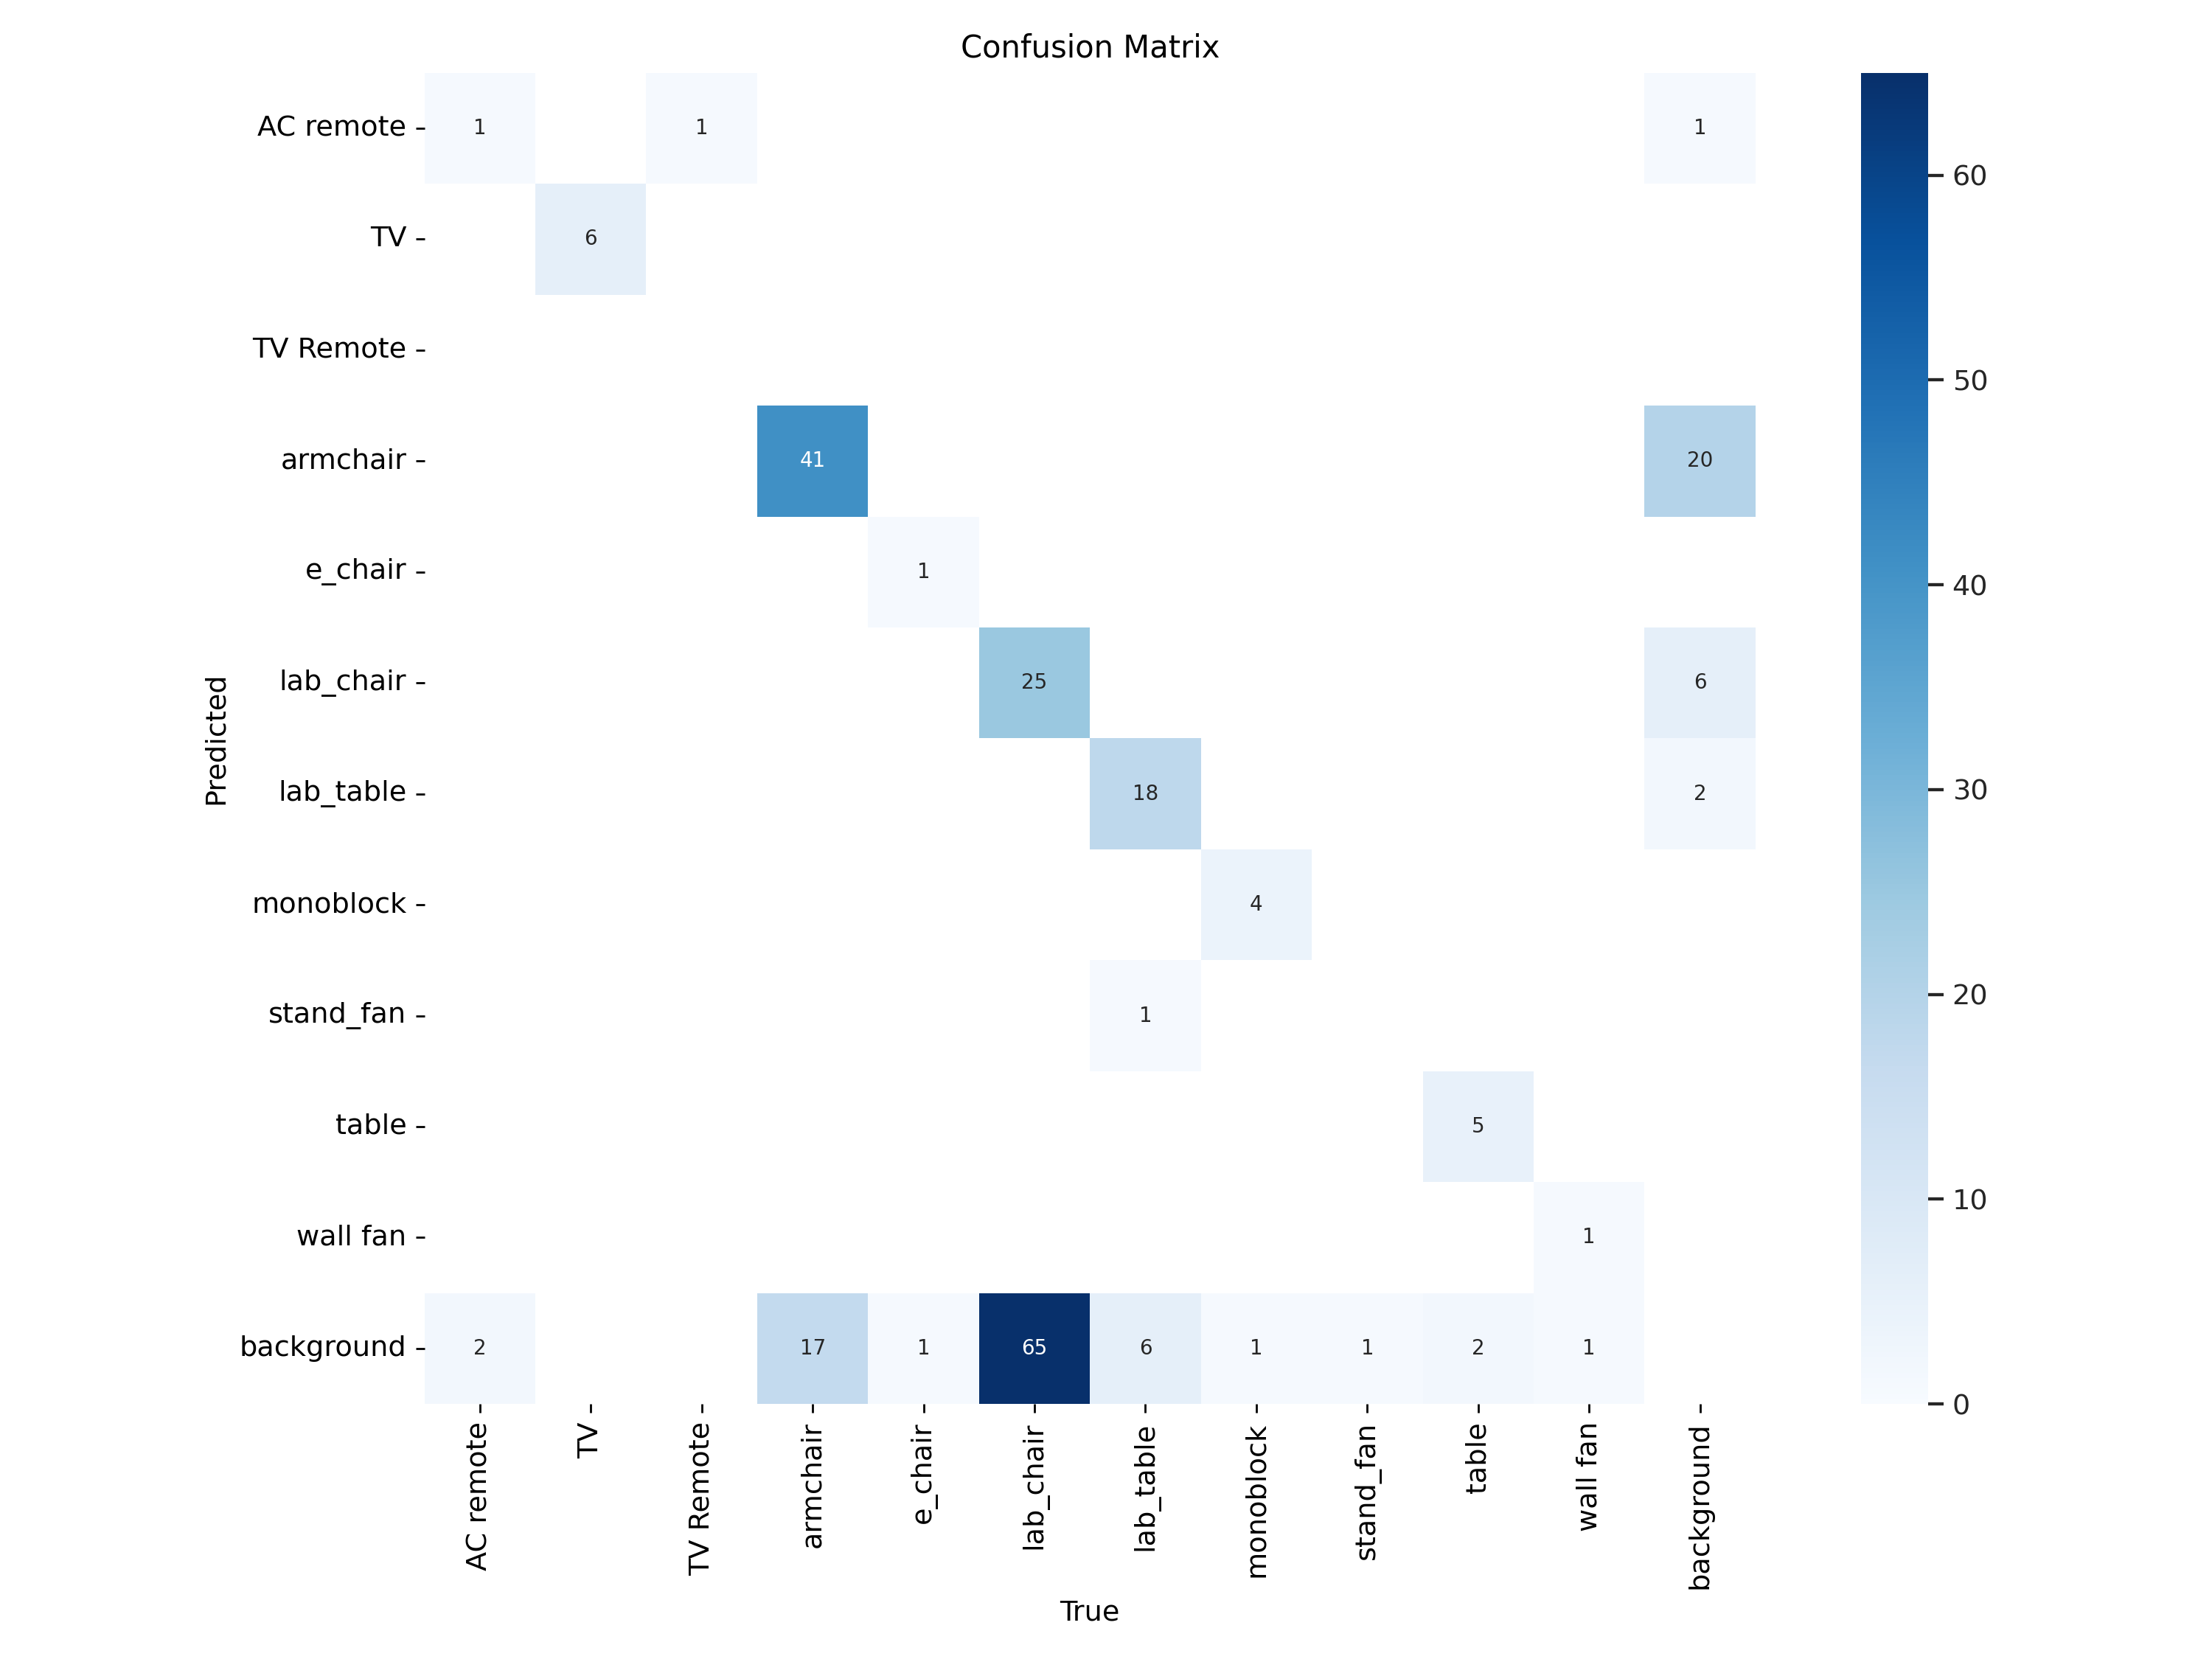

In [15]:
Image(filename=f'/content/runs/detect/train5/confusion_matrix.png', width=1200)

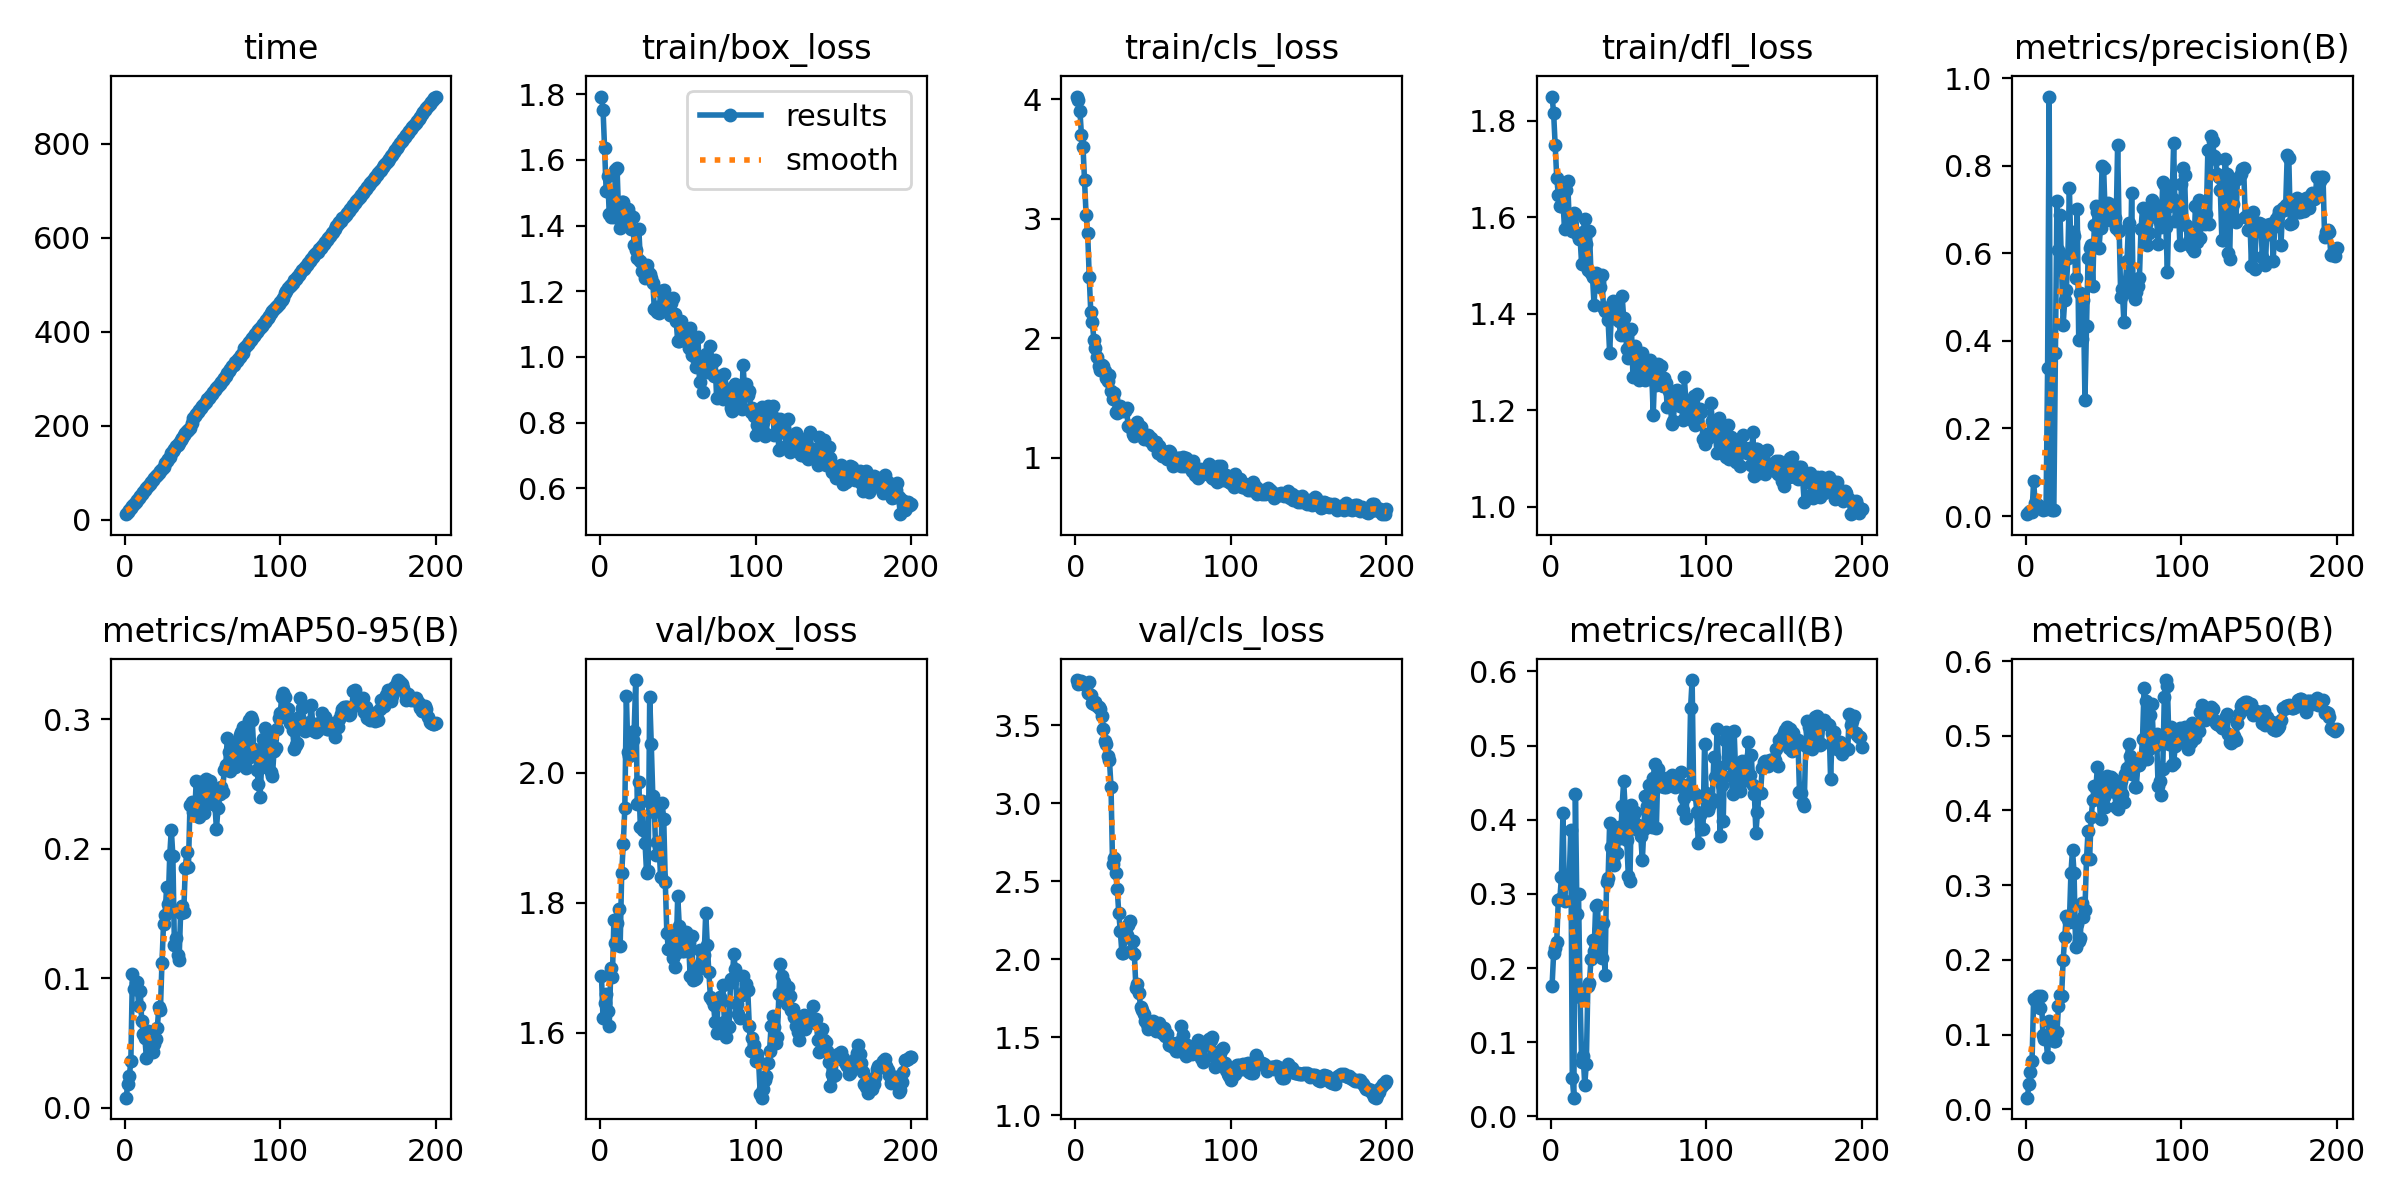

In [16]:
Image(filename=f'/content/runs/detect/train5/results.png', width=1200)

In [17]:
!yolo task=detect mode=val model=/content/runs/detect/train5/weights/best.pt data=/content/try-6/data.yaml

Ultralytics 8.3.12 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 236 layers, 23,209,201 parameters, 0 gradients, 67.5 GFLOPs
val: Scanning /content/try-6/valid/labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100% 22/22 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 126, len(boxes) = 200. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.22s/it]
                   all         22        200      0.691      0.531      0.547      0.331
             AC remote          3          3      0.273      0.333      0.171     0.0685
                    TV          6          6       0.97          1      0.995      0.596
             TV Remote          1          1          1 

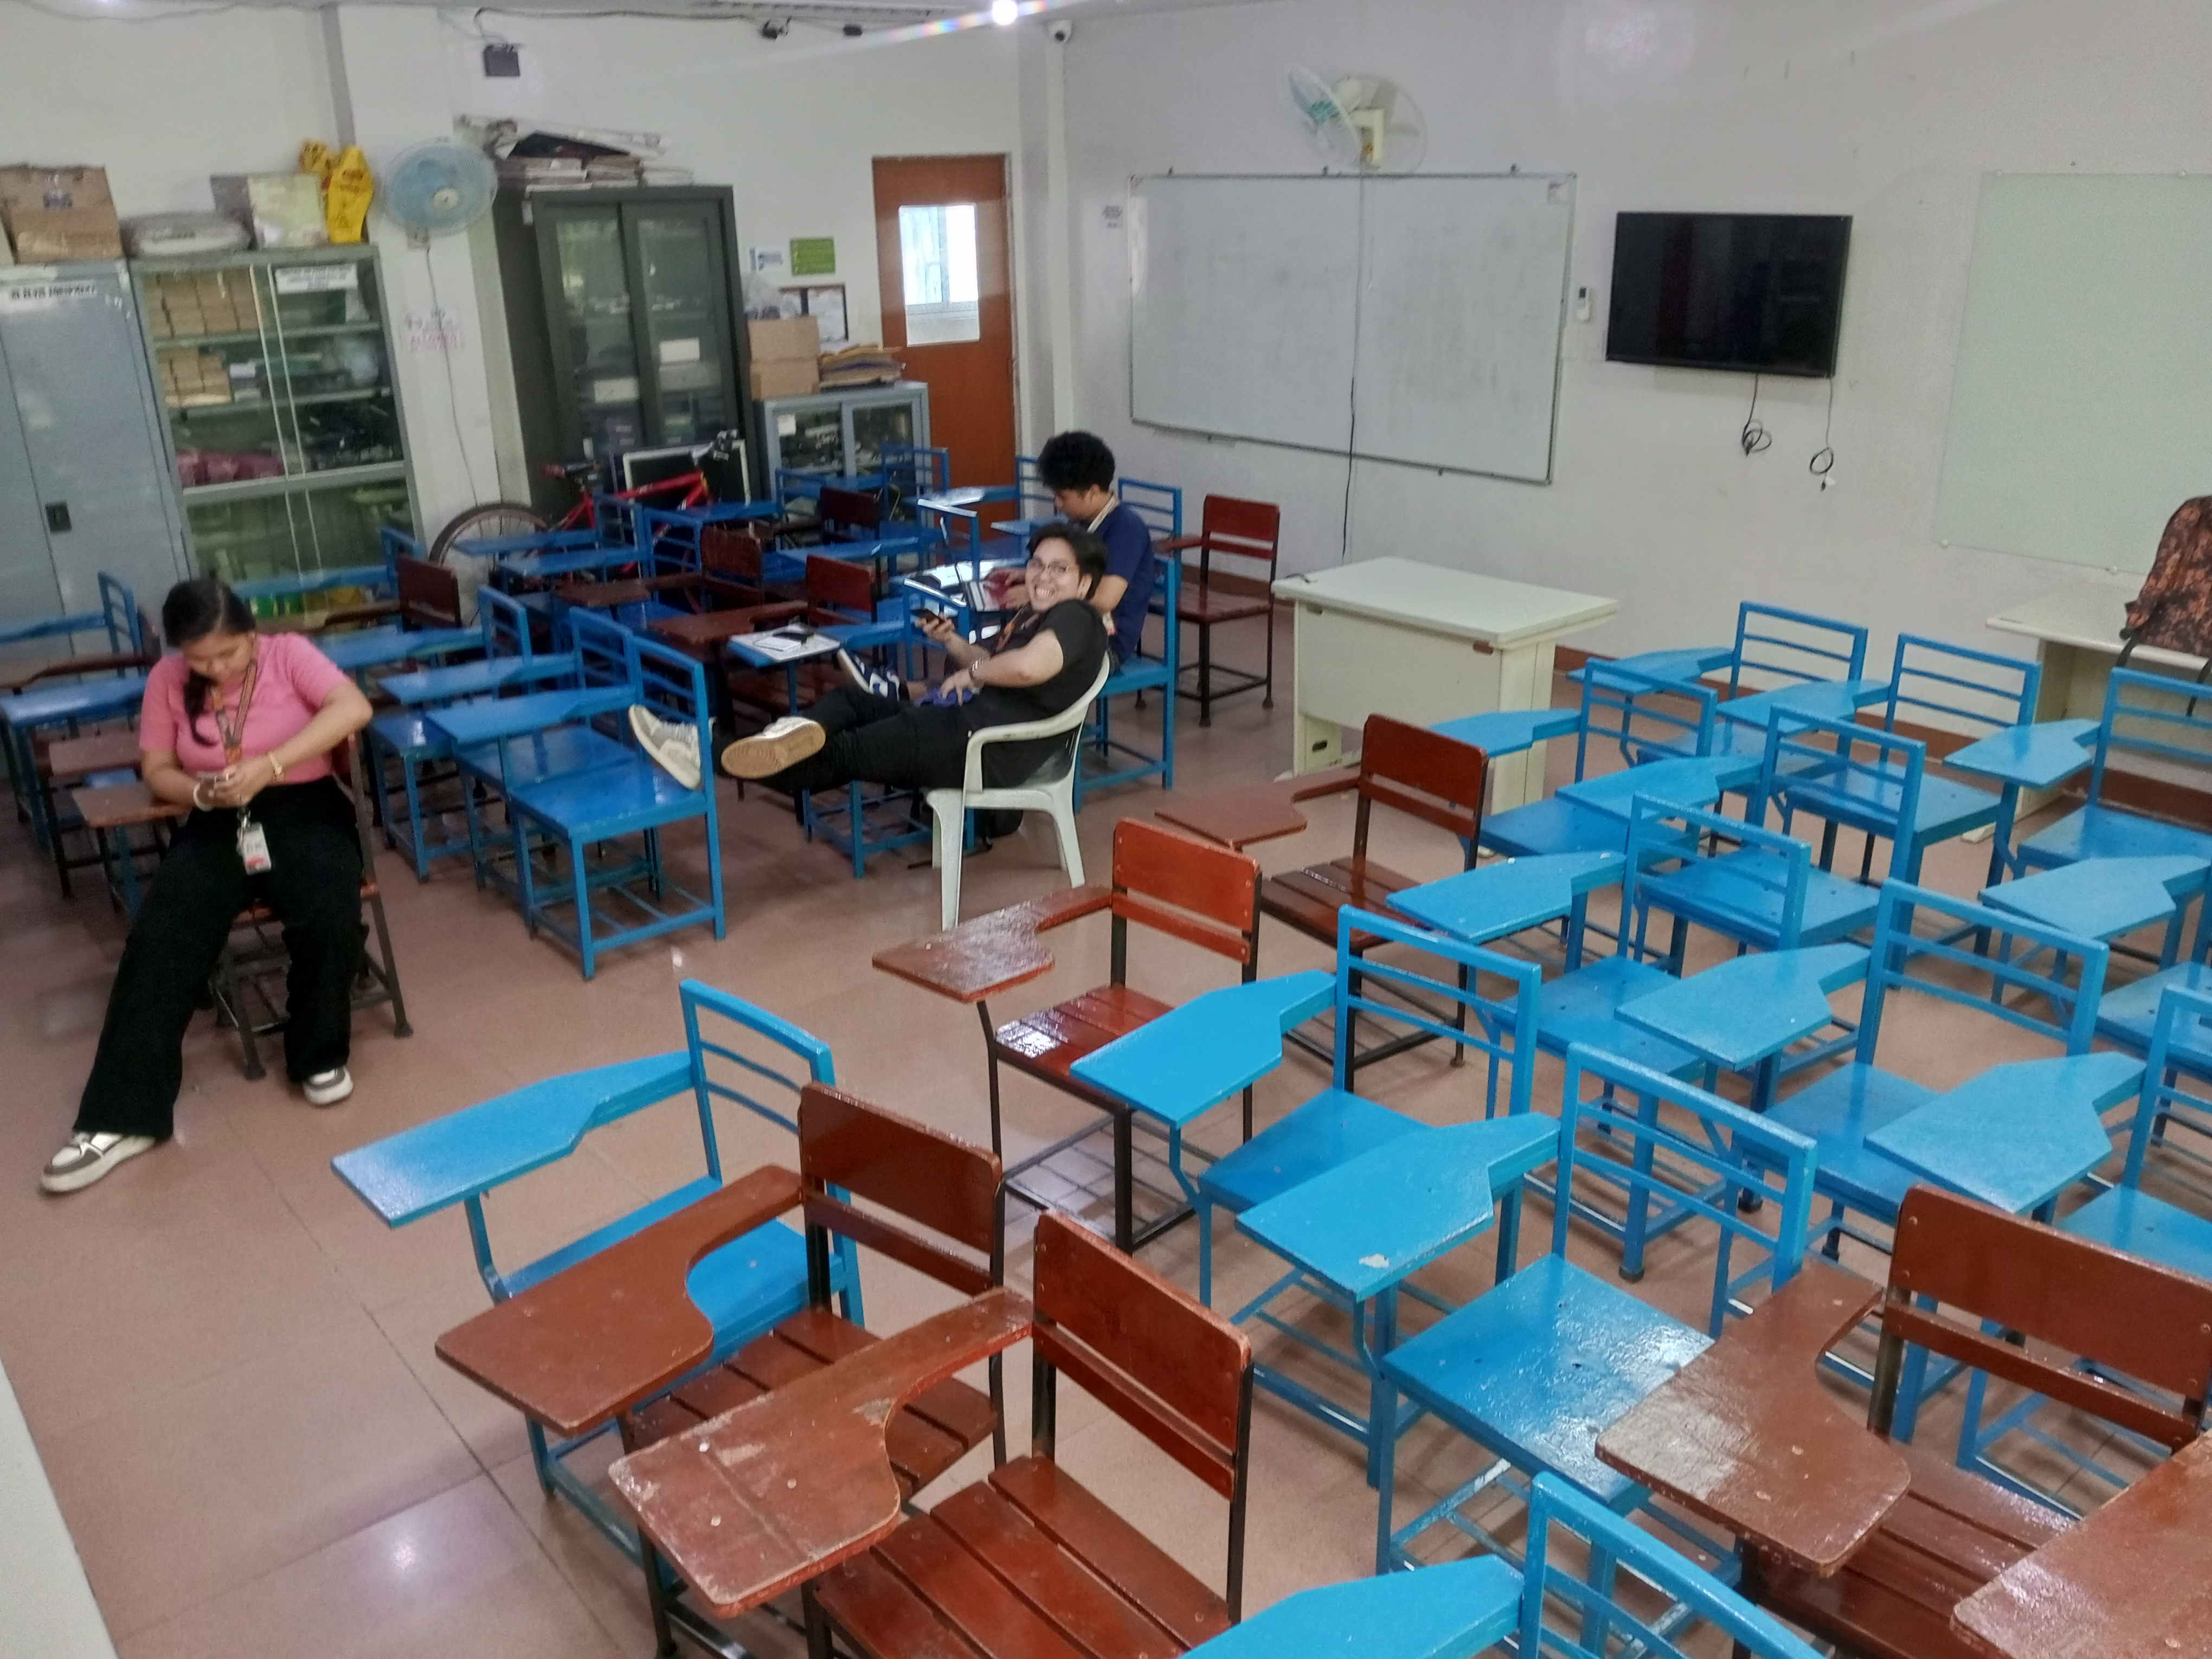

In [20]:
import glob # Changed 'glo' to 'glob'
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/prediction/IMG_20240928_122050_263.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")


image 1/1 /content/runs/detect/prediction/IMG_20240928_122050_263.jpg: 480x640 1 AC remote, 1 TV, 45 armchairs, 1 monoblock, 1 table, 2 wall fans, 27.0ms
Speed: 2.9ms preprocess, 27.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


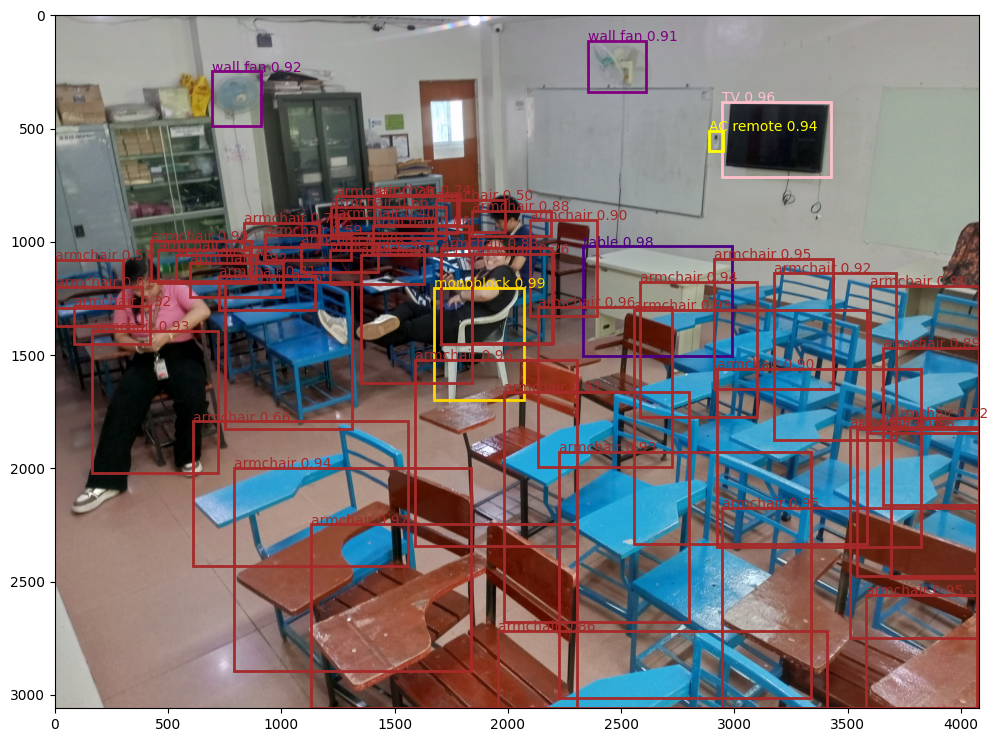

In [25]:
import ultralytics
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Load the YOLOv8 model
model = YOLO('/content/runs/detect/train5/weights/best.pt')  # Replace with your model path

# Set the path to the image
image_path = '/content/runs/detect/prediction/IMG_20240928_122050_263.jpg'  # Replace with your image path

# Perform object detection
results = model.predict(source=image_path, save=False)  # Set save=False to avoid saving the image

# Get the image and bounding boxes
img = mpimg.imread(image_path)

# Set plot size
plt.figure(figsize=(16, 9)) # Adjust these values for desired aspect ratio

# Define a list of bright, distinct colors
# Avoid black and very dark colors
colors = [
    'red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta',
    'yellow', 'lime', 'pink', 'brown', 'teal', 'navy', 'maroon',
    'olive', 'aquamarine', 'coral', 'gold', 'indigo', 'violet'
]

# Create a dictionary to map class IDs to colors, ensuring unique colors
class_colors = {}
used_colors = set()  # Keep track of used colors

for result in results:
    boxes = result.boxes  # Boxes object for detected objects
    for box in boxes:
        b = box.xyxy[0]  # Get bounding box coordinates
        c = box.cls  # Get class ID
        conf = box.conf  # Get confidence score

        # Convert bounding box coordinates to CPU and then to NumPy array
        b = b.cpu().numpy()

        # Convert 'c' and 'conf' to Python scalars before formatting
        c = int(c.item())
        conf = float(conf.item())

        # Assign a unique color to the class if not already assigned
        if c not in class_colors:
            while True:
                color = random.choice(colors)
                if color not in used_colors:
                    class_colors[c] = color
                    used_colors.add(color)
                    break

        # Get the color for the current class
        label_color = class_colors[c]

        # Draw bounding box on the image with the corresponding color
        plt.imshow(img)
        plt.gca().add_patch(plt.Rectangle((b[0], b[1]), b[2] - b[0], b[3] - b[1],
                                         linewidth=2, edgecolor=label_color, facecolor='none'))

        # Display class and confidence with the same color
        plt.text(b[0], b[1], f'{model.names[c]} {conf:.2f}', color=label_color)

plt.show()